# Detection of points of interest with the SIFT method

Objective: The objective is to detect the points of interest between two images with the SIFT method, and the application of the Fundamental matrix with the 8 points method and RANSAC to detect the homologous points Inliers (true points detected) and Outliers (false points detected)

In [1]:
## Import of numpy, matplotlib, and opencv libraries.
import numpy as np
import matplotlib.pyplot as plt
import cv2 

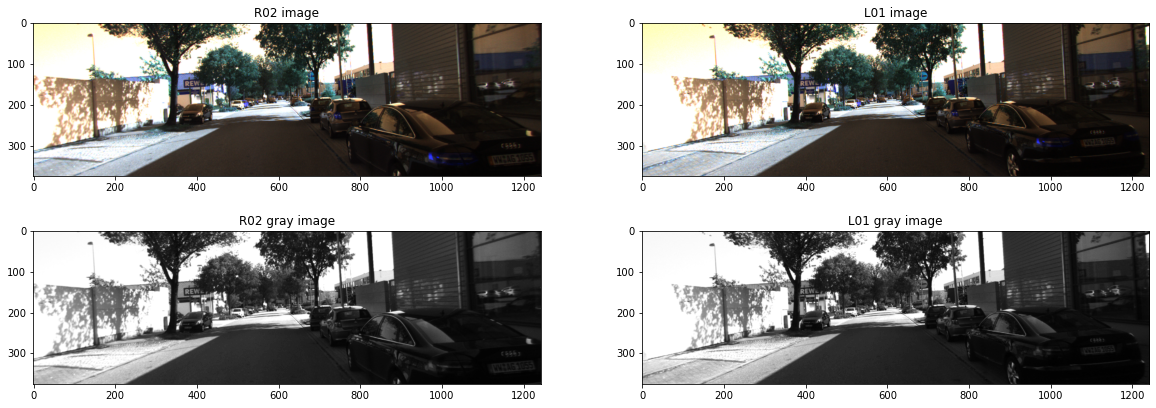

In [6]:
## Read our 2 images, convert them into grayscale and display them
imgO1 = cv2.imread('R02.png')           
imgO2 = cv2.imread('L01.png')   

img1 = cv2.cvtColor(imgO1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(imgO2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 7))
plt.subplot(2, 2, 1)
plt.imshow(imgO1), plt.title('R02 image')
plt.subplot(2, 2, 2)
plt.imshow(imgO2), plt.title('L01 image')
plt.subplot(2, 2, 3)
plt.imshow(img1,'gray'), plt.title('R02 gray image')
plt.subplot(2, 2, 4)
plt.imshow(img2,'gray'), plt.title('L01 gray image')
plt.show()

In [7]:
## Detection of homologous points between our two gray images with the SIFT method
# Create a SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()
# detection of the characteristics of the 2 images
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Creation of a feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True) # NORM_L1 is the preferred choice for SIFT
# Match the descriptors of the two images
matches = bf.match(descriptors1,descriptors2)

Text(0.5, 1.0, 'The image pair and the homologous points with SIFT')

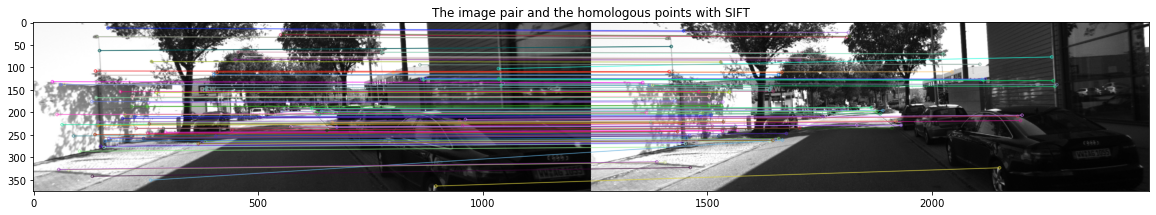

In [8]:
## Display of the image pair and the homologous points found in the previous step

# Sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
#  draw the first 100 matches
matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[0:100], None, flags=2)

# Display
plt.figure(figsize=(20, 5))
plt.imshow(matched_img)
plt.title('The image pair and the homologous points with SIFT')

Comment: The homologous points found are not totally well detected, it is necessary to seek a way to filter the false points detected

In [9]:
## Calculation of the Fundamental matrix with the 8-point method and RANSAC
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find the matrix Fundamental (h) and the coordinates of the homologous points Inliers and Outliers (mask)
h, mask = cv2.findFundamentalMat(points1, points2, cv2.RANSAC+cv2.FM_8POINT)

Text(0.5, 1.0, 'Image pair with homologous points Inliers')

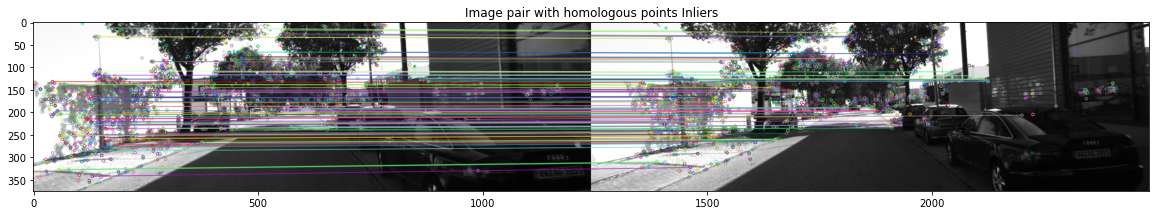

In [11]:
## Identification and tracing of Inliers homologous points found in the previous steps

# Identification of the coordinates of the Inliers homologous points of our two images
Inliers_Pts1 = points1[mask.ravel()==1]
Inliers_Pts2 = points2[mask.ravel()==1]

# Creation of a vector (from zero to the number of points of interest of Inliers)  
LenPts = len(Inliers_Pts2)
Vect_in = np.linspace(0, min(Inliers_Pts1.shape[0], Inliers_Pts2.shape[0])-1, LenPts, dtype=np.int) 

# Convert the coordinates of the points of interest of Inliers for our 2 images to "KeyPoint" 
InkeyPoint1 = [cv2.KeyPoint(x=P[0], y=P[1], _size=1) for P in Inliers_Pts1[Vect_in]] 
InkeyPoint2 = [cv2.KeyPoint(x=P[0], y=P[1], _size=1) for P in Inliers_Pts2[Vect_in]]

InliersImg = np.array([])
# Filter the coordinates of the homologous points of Inliers from the set of points
Inliers_match = [cv2.DMatch(_imgIdx=0, _queryIdx=i, _trainIdx=i,_distance=0) for i in range(len(InkeyPoint2))]

# Identification of the Inliers homologous points (100 points for the display)
InliersImg = cv2.drawMatches(img1, InkeyPoint1, img2, InkeyPoint2, Inliers_match[0:100], img2)

# Tracing the Inliers homologous points
plt.figure(figsize=(20, 5))
plt.imshow(InliersImg)
plt.title('Image pair with homologous points Inliers')

Text(0.5, 1.0, 'Image pair with homologous points Outliers')

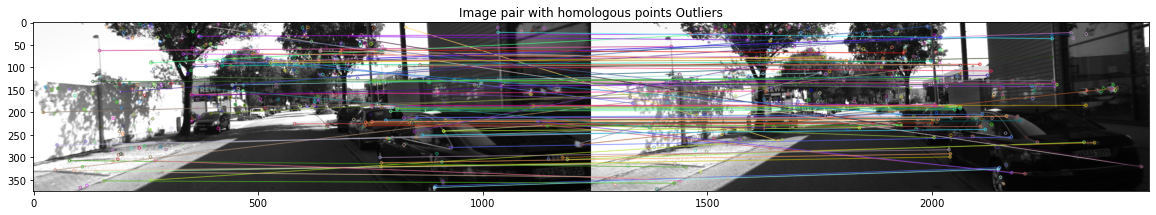

In [12]:
## Identification and tracing of homologous outliers.

# Identification of the coordinates of the homologous points Outliers of our two images
Outliers_Pts1 = points1[mask.ravel()==0]
Outliers_Pts2 = points2[mask.ravel()==0]

## Creation of a vector (from zero to the number of homologous points of Outliers)  
LenPts = len(Outliers_Pts2)
Vect_out = np.linspace(0, min(Outliers_Pts1.shape[0], Outliers_Pts2.shape[0])-1, LenPts, dtype=np.int) 

## Convert the coordinates of the points of interest of Outliers for our 2 images to "KeyPoint" 
OutkeyPoint1 = [cv2.KeyPoint(x=P[0], y=P[1], _size=1) for P in Outliers_Pts1[Vect_out]] 
OutkeyPoint2 = [cv2.KeyPoint(x=P[0], y=P[1], _size=1) for P in Outliers_Pts2[Vect_out]]

OutliersImg = np.array([])
## Filter the coordinates of the homologous points of Outliers
Outliers_match = [cv2.DMatch(_imgIdx=0, _queryIdx=i, _trainIdx=i,_distance=0) for i in range(len(OutkeyPoint2))]

## Identification of Outliers homologous points (100 points for the display)
OutliersImg = cv2.drawMatches(img1, OutkeyPoint1, img2, OutkeyPoint2, Outliers_match[0:100], img2)

## Tracing the homologous points Outliers
plt.figure(figsize=(20, 5))
plt.imshow(OutliersImg)
plt.title('Image pair with homologous points Outliers')

Comment: In this part we notice the false homologous points detected, so in this way we can filter them from our homologous points detection system.